# Use Multiple Linear Regression to Predict Medical Insurance Costs and House Prices

This report attempts to conduct basic data analysis and multi-linear regression on two datasets. The first dataset is USA residents’ demographic characteristics and their medical insurance charges. Analysis found individuals with higher age and weight are likely to be charged more. The second dataset contains details about over 70 features and selling price of houses in Ames, Iowa. Analysis found price pattern in regard to neighborhood that still exists today. It also revealed overall quality to be the most influential price factor, although all house features ultimately contribute to price, even nominal features with no inherent ranking such as shape of the property. According to performance metrics, the multi-linear regression model performed satisfactorily on predicting housing prices but not medical insurance charges.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

## Medical Insurance

In [2]:
insurance = pd.read_csv("Medical_Insurance_Cost.csv")

This data contains age, sex, BMI (body mass index), number of children, smoking condition, region, and medical insurance charges of 1338 US residents.

In [3]:
# null value
print(insurance.isnull().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


No null values found.

### Variable description

In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Age distribution

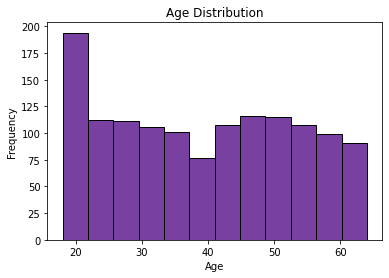

In [5]:
sns.histplot(insurance['age'],color='indigo')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The sample population's average age is 39. The youngest individual is 18 and the oldest is 64. From the distribution graph, the number of individuals in different age groups remain relatively at the same level, except for the 20-year-old interval.

#### BMI distribution

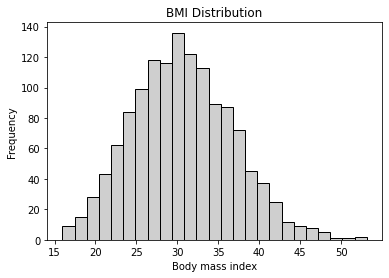

In [6]:
sns.histplot(insurance['bmi'],color='silver')
plt.title('BMI Distribution')
plt.xlabel('Body mass index')
plt.ylabel('Frequency')
plt.show()

The BMI scores appear as a normal distribution, with the first quartile at 26 and mean at 30. According to the NSW Government Department of Health (2023), BMI score 18.5-24.9 is the healthy range and 30 is the dividing line between overweight and obese. This means 75% of the sample population is overweight and 50% are obese, which is a potential bias.

#### Medical insurance charges distribution

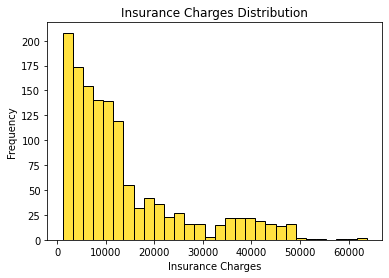

In [7]:
sns.histplot(insurance['charges'],color='gold')
plt.title('Insurance Charges Distribution')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.show()

The medical insurance charges have a gamma distribution. The higher the charges, the less frequent they are. The frequencies decrease as the charges increase, from 1000 to 64000.

#### Sample profile

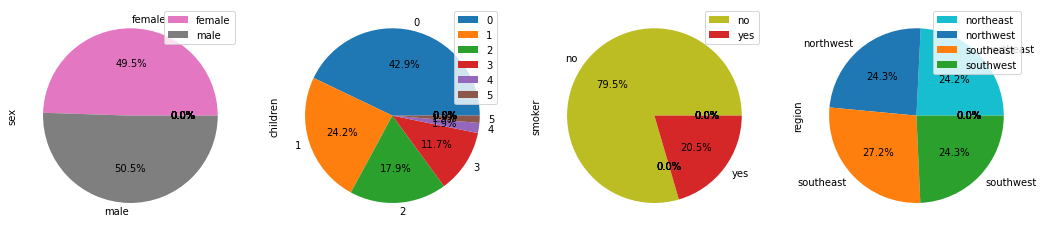

In [8]:
sample_profile = insurance.drop(["age", "bmi", "charges"], axis=1)
counts = sample_profile.apply(pd.Series.value_counts)
counts.plot.pie(subplots=True, figsize=(18, 6), autopct="%1.1f%%")
plt.show()

From left to right are sex, childre, smoking condition, and region.  
The females and males share equal proportion of the sample population. Same with the four regions.  
Half of the sample have no children, while one quarter have one and the rest have more than one. Eighty percent of the sample are non-smokers.

Pearson Correlation:
                 age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


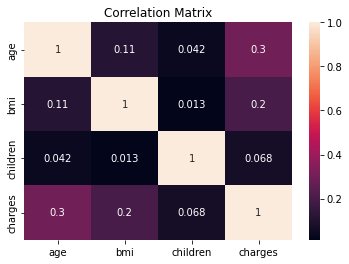

In [9]:
# correlation
correlation = insurance.corr(method='pearson',numeric_only=True)
print("Pearson Correlation:\n ", correlation)
# correlation heatmap
sns.heatmap(correlation,annot=True)
plt.title("Correlation Matrix")
plt.show()

Lastly, correlation analysis is conducted. The result shows a moderate 0.3 correlation between age and charges, and a weak 0.2 correlation between BMI and charges, but no significant correlation between other variables and charges. Additionally, the BMI score is found to be weakly correlated with age.

### Medical Insurance Prediction 

In [10]:
# one hot encoding
cols = ['sex','smoker','region']
transformColumn = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),cols)], remainder='passthrough')
insurance_coded = transformColumn.fit_transform(insurance)

The three nominal variables (sex, smoking condition, region) are transformed into numerical variables using one-hot encoding.

In [11]:
# Multi-linear regression
X = insurance_coded[:,:-1]
Y = insurance_coded[:,-1]
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)

Afterwards, data is split into training/testing sets according to 8/2 ratio and used to train the multilinear regression model. Age, sex, BMI, number of children, smoking condition and region are the independent variables. Medical insurance charge is the dependent variable.

In [12]:
# evaluaton
mae=metrics.mean_absolute_error(Y_test, Y_predicted) 
print('Mean absolute error: ',mae)
mse = mean_squared_error(Y_test, Y_predicted)
print('Mean squared error: ',mse)
rmse = np.sqrt(mse)
print('Root mean square error: ',rmse)

Mean absolute error:  4404.037106284879
Mean squared error:  43399514.34057383
Root mean square error:  6587.830776558687


Considering medical insurances charges range from 1000 to 64000 and its third quartile resides at 16639, the performance of the multilinear regression model is not the most desirable. This traces back to not having independent variables that highly correlate to the dependent variable.

## House Price

In [13]:
# import data, drop ID
house = pd.read_csv('Housing_Price.csv').drop('Id',axis=1)

This dataset contains the final selling price of 1460 residential houses in Ames, Iowa and detailed records of 79 house features, such as overall quality and above ground living area square feet. Below is the variable analysis and application of multiple linear regression to predict sale price based on house attributes.

### Variable of interest: house price

To gain an overview of the house sale prices, below a histogram is plotted, which reveals a positively skewed normal distribution with mean at around 180000. This means most houses are sold at relatively low price range, fewer and fewer houses are sold with price rising.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

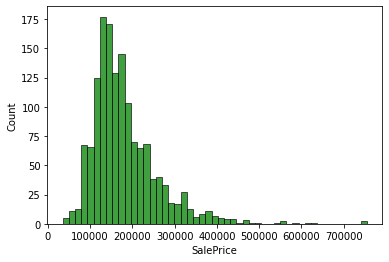

In [14]:
# price distribution
price=house['SalePrice']
sns.histplot(price,color='green')

To provide guidance for house buyers, below a boxplot is plotted, listing house prices of all neighborhoods from low to high according to their median.

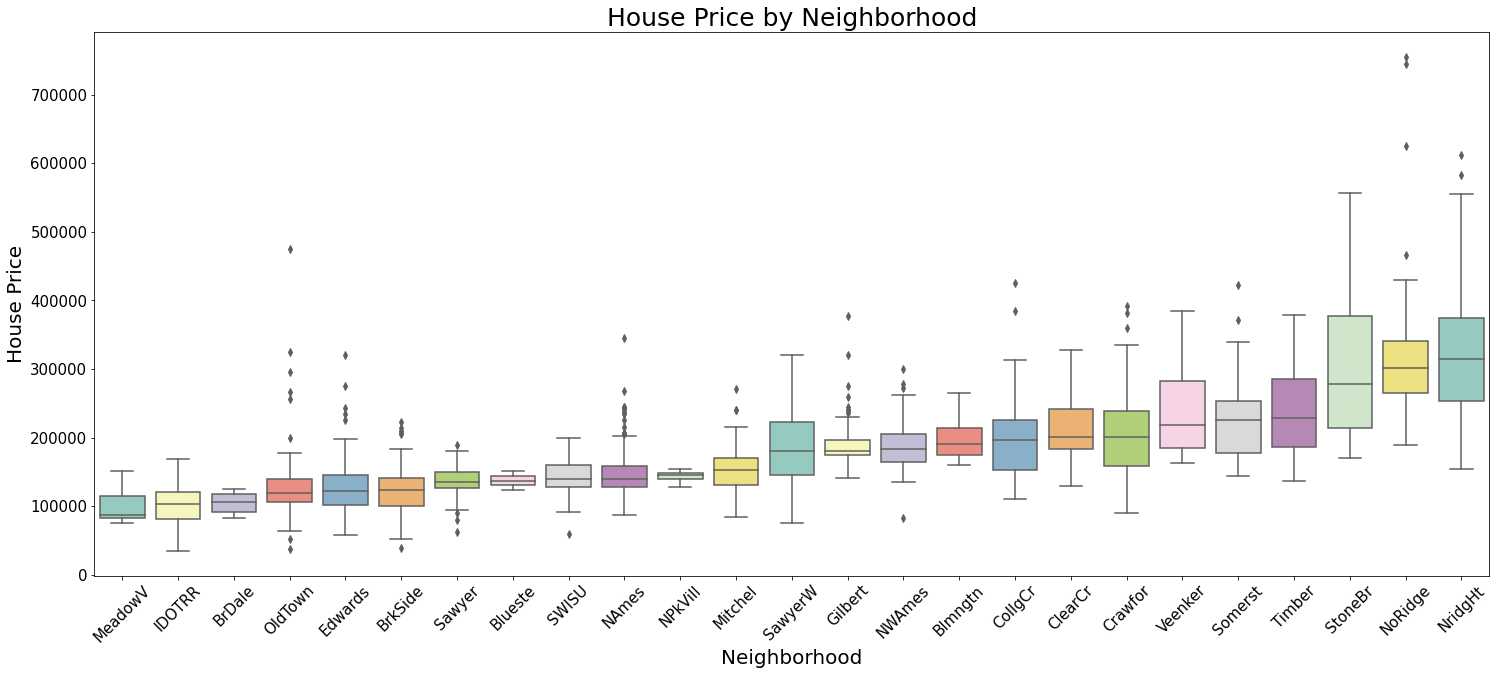

In [15]:
# neighborhood comparison
neighborhood_order = house.groupby('Neighborhood')['SalePrice'].median().sort_values().index.tolist()

plt.figure(figsize=(25, 10))
sns.boxplot(x='Neighborhood', y='SalePrice', data=house, palette='Set3', order=neighborhood_order)
plt.title('House Price by Neighborhood', fontsize=25)
plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('House Price', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.show()

It shows a gradual increase among different neighborhoods. MeadowV is the cheapest neighborhood with median below 100,000, while NridgHt is the most expensive neighborhood with median reaching almost 300,000. Notably the exceptionally high-priced houses are located in NoRidge, the second most expensive neighborhood.  
This comparative pattern among neighborhoods revealed by boxplot is still present in current Ames, Iowa house market, regardless of overall price increase, as indicated by data from Zillow (Zillow 2023). For instance, Northridge still has higher home value than the majority neighborhoods while Edwards is the opposite.

### Data cleaning

In [16]:
# 36 numerical variables, excluding price
quantitative = house.select_dtypes(include=np.number).columns
print(quantitative,'\n',len(quantitative))
# 43 categorical variables
quanlitative = house.select_dtypes(exclude=np.number).columns
print(quanlitative,'\n',len(quanlitative))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
 37
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'H

There are 79 independent variables in total, describing the house conditions; and one dependent variable, the sale price. Out of the 79 independent variables, 36 are numerical and 43 are categorical. 

In [17]:
# 19 variables with null, null percentage and variable data type
var_dt = house.dtypes
var_with_null = house.columns[house.isnull().any()].tolist()

null_percentage_all = (house.isnull().sum()/len(house)).sort_values(ascending=False)
null_percentage = pd.DataFrame({
    'Variable': [var for var in null_percentage_all.index if null_percentage_all[var] > 0],
    'Null Percentage': [round(null_percentage_all[var]*100,2) for var in null_percentage_all.index if null_percentage_all[var] > 0],
    'Data Type': [var_dt.loc[var] for var in null_percentage_all.index if null_percentage_all[var] > 0]
})
print(null_percentage)

        Variable  Null Percentage Data Type
0         PoolQC            99.52    object
1    MiscFeature            96.30    object
2          Alley            93.77    object
3          Fence            80.75    object
4    FireplaceQu            47.26    object
5    LotFrontage            17.74   float64
6    GarageYrBlt             5.55   float64
7     GarageCond             5.55    object
8     GarageType             5.55    object
9   GarageFinish             5.55    object
10    GarageQual             5.55    object
11  BsmtExposure             2.60    object
12  BsmtFinType2             2.60    object
13      BsmtCond             2.53    object
14      BsmtQual             2.53    object
15  BsmtFinType1             2.53    object
16    MasVnrArea             0.55   float64
17    MasVnrType             0.55    object
18    Electrical             0.07    object


Further analysis revealed 19 variables with null value and the highest null value percentage reaches 99.52%.

In [18]:
# replace null with zero
clean=house[['LotFrontage','GarageYrBlt','MasVnrArea']].fillna(0)
house_clean = house
house_clean[['LotFrontage','GarageYrBlt','MasVnrArea']]=clean

To avoid dropping variables or large number of observations, null values are replaced with zero.

In [19]:
# 9 ordinal variables mapped to 1-5, same as existing numerical quality system in the data
qualities = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond','PoolQC']
mapper = {np.NaN:0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
house_mapped = house_clean
for var in qualities:
    house_mapped[var] = house_clean[var].replace(mapper)

According to the data description file, 9 ordinal categorical variables such as 'ExterQual' (exterior quality) and 'BsmtQual' (basement quality) share the same rating system (from poor to excellent). They are transformed using mapping. The rest 34 nominal variables will be transformed using one-hot encoding in the following section.

### Which House Features Impact the Sale Price the Most?

To understand which features have greater impact on house price and use them to better predict house price, independent variables are tested on their correlation with the dependent variable sale price. Those with correlation exceeding 0.5 are displayed below. Note only numerical and ordinal variables are tested.

In [20]:
# variables with correlation greater than 0.5
var_correlation = pd.DataFrame(house_mapped.corr()['SalePrice'].drop('SalePrice'))
var_corr=var_correlation.sort_values(by='SalePrice',ascending=False)

high_corr = var_corr[var_corr['SalePrice']>0.5]
print(high_corr)

              SalePrice
OverallQual    0.790982
GrLivArea      0.708624
ExterQual      0.682639
KitchenQual    0.659600
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
BsmtQual       0.585207
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897
YearRemodAdd   0.507101


C:\Users\Chuyu\AppData\Local\Temp\ipykernel_9880\2540858562.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  var_correlation = pd.DataFrame(house_mapped.corr()['SalePrice'].drop('SalePrice'))


Results show 13 features with correlations over 0.5, and overall quality is the most impactful attribute with a 0.79 correlation. The rest of the features concern living area, exterior, kitchen, garage, basement, bathroom and built year. Both buyers and sellers can use these as metrics for price estimation and validation.

### House Sale Price Prediction

#### Prediction based on numerical and ordinal variables

The first prediction method utilizes only the 36 numerical variables, and 9 ordinal variables that were previously transformed through mapping, making 45 in total which are displayed below. They are input into the multi-linear regression model as independent variables to predict the dependent variable house price.

In [21]:
# variables that will participate in the first multilinear regression
print(var_corr.T.columns)

Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'HeatingQC', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'GarageQual', 'LotArea', 'GarageCond', 'GarageYrBlt',
       'BsmtFullBath', 'BsmtUnfSF', 'BsmtCond', 'LotFrontage', 'BedroomAbvGr',
       'PoolQC', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'ExterCond',
       'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


In [22]:
# Multi-linear regression based on quantitative variables (previously eligible for correlation analysis)
X1 = house_mapped.select_dtypes(include=np.number).values[:, :-1] 
Y1 = house_mapped['SalePrice'].values
X_train1,X_test1, Y_train1,Y_test1 = train_test_split(X1,Y1,test_size=0.2)
model1 = LinearRegression()
model1.fit(X_train1, Y_train1)
Y_predicted1 = model1.predict(X_test1)
# evaluaton
mae1 = metrics.mean_absolute_error(Y_test1, Y_predicted1) 
print('Mean absolute error: ',mae1)
mse1 = mean_squared_error(Y_test1, Y_predicted1)
print('Mean squared error: ',mse1)
rmse1 = np.sqrt(mse1)
print('Root mean square error: ',rmse1)

Mean absolute error:  21029.531472516475
Mean squared error:  773750805.8785714
Root mean square error:  27816.37657709162


The same metrics, mean absolute error (MAE), mean squared error (MSE) and root mean square error (RMSE) are used to evaluate model performance. Considering the house prices has a mean around 180,000, this multi-linear regression model performed adequately.

#### Prediction based on all variables

The second method utilizes all variables in the dataset, including numerical, ordinal and nominal ones. Compared to the first method, the addition is the nominal variables that were transformed using one-hot encoding.

In [23]:
# one hot encoding
cols = house_mapped.select_dtypes(exclude=np.number).columns
transformColumn = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),cols)], remainder='passthrough')
house_coded = transformColumn.fit_transform(house_mapped)
# converse to dense array to perform slicing
house_coded=house_coded.toarray()

In [24]:
# Multi-linear regression based on all variables 
X2 = house_coded[:,:-1]
Y2 = price.values
X_train2,X_test2, Y_train2,Y_test2 = train_test_split(X2,Y2,test_size=0.2)
model2 = LinearRegression()
model2.fit(X_train2, Y_train2)
Y_predicted2 = model2.predict(X_test2)
# evaluaton
mae2 = metrics.mean_absolute_error(Y_test2, Y_predicted2) 
print('Mean absolute error: ',mae2)
mse2 = mean_squared_error(Y_test2, Y_predicted2)
print('Mean squared error: ',mse2)
rmse2 = np.sqrt(mse2)
print('Root mean square error: ',rmse2)

Mean absolute error:  21014683.041684505
Mean squared error:  1.2867623845157992e+17
Root mean square error:  358714703.4226224


The resulted performance metrics MAE, MSE, and RMSE are slightly better than the first method. Therefore, even house attributes with no inherent ranking order such as type of dwelling and property shape still contribute to the final price, albeit slightly. As seen in the previous analysis of the relationship between prices and one of the nominal variables - neighborhood.

## Conclusion
In the medical insurance dataset, age and BMI exhibit a weak correlation, and both variables correlate positively with medical insurance charges. Therefore, individuals with higher age and weight are likely to be charged more. The multiple linear regression prediction yielded MAE and RMSE of around 5000, which is unsatisfying compared to the insurance charge mean 13270. This is explainable by the lack of strong correlation between dependent and independent variables.  
In the house price dataset, different neighborhoods are revealed to hold different house values. At the same time, overall house quality is the biggest price-decider, among living area, exterior, basement, bathroom, etc. In this case multiple linear regression was able to produce satisfactory prediction with MAE and RMSE around 25000 while the house price mean is around 180000. All house features, including ordinal qualities, facilitate greater prediction accuracy.

## References

NSW Government Department of Health 2023, Body Mass Index (BMI) calculator, NSW Government Department of Health, viewed 28 March 2023, <https://www.health.nsw.gov.au/heal/Pages/bmi.aspx>.  
  
Zillow 2023, Ames home values, Zillow, viewed 28 March 2023, <https://www.zillow.com/home-values/30210/ames-ia/>.